# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config_shared_kum.yml'

loaded_info = parse_config_for_analysis(config_path)



C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json
0


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_shared_kum_rationalized.pt


GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cpu")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

## Perplexity and Accuracy

In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE

lm_RE.hard = True
lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1,)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.25it/s]

{'mean_acc': {'mean': 0.32420535571210324, 'std': 0.0}, 'mean_perplexity': {'mean': 35.15487472697085, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.5417782607557935, 'std': 0.0}}
{'mean_acc': 0.36886463025286526, 'mean_perplexity': 28.4635420015274, 'mean_mask_percentage': 0}


## Change in perplexity TODO

In [5]:
# ### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)
# change_in_perplexity

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

#Make sure we use the hard (binarized) values


rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(57.1909, device='cuda:0'), 'rel_average': tensor(0.6655, device='cuda:0'), 'abs_pos_count': Counter({0.0: 12979, 1.0: 281, 2.0: 149, 12.0: 123, 21.0: 123, 16.0: 120, 22.0: 119, 8.0: 115, 13.0: 112, 36.0: 107, 14.0: 106, 23.0: 102, 9.0: 97, 17.0: 95, 34.0: 91, 33.0: 91, 26.0: 89, 11.0: 87, 20.0: 87, 10.0: 86, 48.0: 85, 51.0: 84, 46.0: 84, 81.0: 84, 5.0: 83, 49.0: 83, 24.0: 82, 31.0: 79, 18.0: 78, 37.0: 78, 28.0: 77, 63.0: 77, 57.0: 77, 83.0: 77, 64.0: 76, 15.0: 75, 45.0: 74, 59.0: 74, 27.0: 73, 69.0: 73, 41.0: 71, 114.0: 71, 35.0: 70, 60.0: 70, 25.0: 69, 19.0: 69, 53.0: 69, 50.0: 68, 71.0: 68, 55.0: 67, 61.0: 66, 82.0: 66, 106.0: 66, 99.0: 66, 42.0: 65, 7.0: 64, 39.0: 62, 65.0: 62, 113.0: 62, 116.0: 60, 30.0: 59, 78.0: 59, 68.0: 59, 29.0: 58, 32.0: 57, 44.0: 57, 43.0: 57, 84.0: 56, 110.0: 56, 6.0: 55, 107.0: 55, 160.0: 54, 3.0: 53, 54.0: 53, 79.0: 53, 93.0: 53, 158.0: 53, 47.0: 52, 66.0: 52, 62.0: 51, 77.0: 51, 164.0: 51, 146.0: 51, 127.0: 51, 76.0: 50, 94.0: 50, 

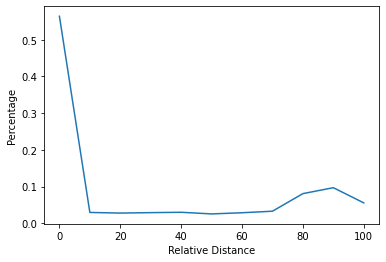

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

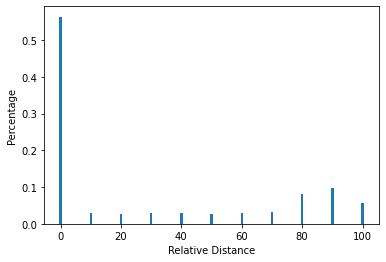

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

## Analysing some examples

In [9]:
examples = ["How are you doing? [SEP]", "What did you do today? [SEP]", "How's work? [SEP]", "Would you like some coffee? [SEP]"]

In [13]:
## First with greedy rationals
completed_dialogue = lm_RE.complete_dialogues(examples, total_length=200, greedy_rationals=False)


In [14]:
from utils.analysis import pretty_print_completed_dialogues
pretty_print_completed_dialogues(completed_dialogue)

context ----> response
how are you doing ? [SEP] ------> fine . i ’ m sure i ’ m a little stunni . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [SEP] fine . i ’ m sure i ’ m a little stunni . [SEP] ------> nice to meet you . what do you do , i know ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] nice to meet you . what do you do , i know ? [SEP] ------> you see , i ' ll see the doctor . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] , i know ? [SEP] you see , i ' ll see the doctor . [SEP] ------> that ’ s the problem . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [M

In [15]:
completed_dialogue

[{'completed_dialogue': "how are you doing ? [SEP] fine . i ’ m sure i ’ m a little stunni . [SEP] nice to meet you . what do you do , i know ? [SEP] you see , i ' ll see the doctor . [SEP] that ’ s the problem . [SEP] that is . i ’ ll do it . [SEP] i am glad that you ’ ll have to go . [SEP] why don ' t you get it ? [SEP] that ' s true . [SEP] that ’ ll be a problem . [SEP] you ’ ll do it . [SEP] you ’ ll be able to go to the meeting . [SEP] oh , i know . [SEP] that ' s great . [SEP] how much is it ? [SEP] it ’ s not a very cheapest . [SEP] what ' s the weather about ? [SEP] it ’ s the ring . [SEP] how come to get him on sunday . [SEP] it ’ s just a good time . [SEP] how long is the job you want a lot of money ? [SEP] it ' s my pleasure . [SEP]",
  'rationals': [tensor([]),
   tensor([False, False, False, False, False,  True,  True,  True,  True,  True,
            True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
            True,  True,  True], device='cuda:0'),
  